In [68]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
f_g_index = pd.read_csv('/content/drive/MyDrive/ds_thanseela/csv_files/fear_greed_index.csv')
trade = pd.read_csv('/content/drive/MyDrive/ds_thanseela/csv_files/historical_data.csv')


In [70]:
print("Sentiment dataset shape:", f_g_index.shape)
print("Trading dataset shape:", trade.shape)


Sentiment dataset shape: (2644, 4)
Trading dataset shape: (211224, 16)


In [71]:
f_g_index.head(10)


,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018
5,1517895000,8,Extreme Fear,06-02-2018
6,1517981400,36,Fear,07-02-2018
7,1518067800,30,Fear,08-02-2018
8,1518154200,44,Fear,09-02-2018
9,1518240600,54,Neutral,10-02-2018


In [72]:
trade.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [73]:
print("f_g index dataset columns:\n", f_g_index.columns.tolist())
print("\nTrading dataset columns:\n", trade.columns.tolist())

f_g index dataset columns:
 ['timestamp', 'value', 'classification', 'date']

Trading dataset columns:
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [74]:
print(f_g_index[['timestamp', 'date']].head())
print(trade[['Timestamp', 'Timestamp IST']].head())

    timestamp        date
0  1517463000  01-02-2018
1  1517549400  02-02-2018
2  1517635800  03-02-2018
3  1517722200  04-02-2018
4  1517808600  05-02-2018
      Timestamp     Timestamp IST
0  1.730000e+12  02-12-2024 22:50
1  1.730000e+12  02-12-2024 22:50
2  1.730000e+12  02-12-2024 22:50
3  1.730000e+12  02-12-2024 22:50
4  1.730000e+12  02-12-2024 22:50


In [75]:
f_g_index['timestamp'] = pd.to_datetime(f_g_index['timestamp'], unit='s', errors='coerce')
f_g_index['date'] = pd.to_datetime(f_g_index['date'], format='%d-%m-%Y', errors='coerce')


In [76]:
trade['Timestamp'] = pd.to_datetime(trade['Timestamp'], unit='ms', errors='coerce')
trade['Timestamp IST'] = pd.to_datetime(trade['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')


In [77]:
trade['date'] = trade['Timestamp IST'].dt.date
trade['date'] = pd.to_datetime(trade['date'])

In [78]:
trade.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

merged = pd.merge_asof(
    trade.sort_values('date'),
    f_g_index.sort_values('date'),
    on='date',
    direction='backward'
)

In [79]:
print("Merged dataset shape:", merged.shape)
print(merged[['date', 'classification', 'closed_pnl', 'size_usd']].head())


Merged dataset shape: (211224, 20)
        date classification  closed_pnl  size_usd
0 2023-05-01          Greed         0.0    137.08
1 2023-05-01          Greed         0.0    183.53
2 2023-05-01          Greed         0.0    156.39
3 2023-12-05  Extreme Greed         0.0  24370.62
4 2023-12-05  Extreme Greed         0.0    628.00


In [80]:
sentiment_summary = merged.groupby('classification').agg({
    'closed_pnl': ['mean', 'median'],
    'size_usd': 'mean',
    'execution_price': 'mean'
}).reset_index()


In [81]:
print("\nSummary:\n", sentiment_summary)


Summary:
   classification closed_pnl            size_usd execution_price
                       mean median         mean            mean
0   Extreme Fear  34.537862    0.0  5349.731843     7054.795108
1  Extreme Greed  67.892861    0.0  3112.251565     6082.195865
2           Fear  54.290400    0.0  7816.109931    14152.620222
3          Greed  43.582684    0.0  5737.962662    13409.677192
4        Neutral  34.307718    0.0  4782.732661    12393.692779


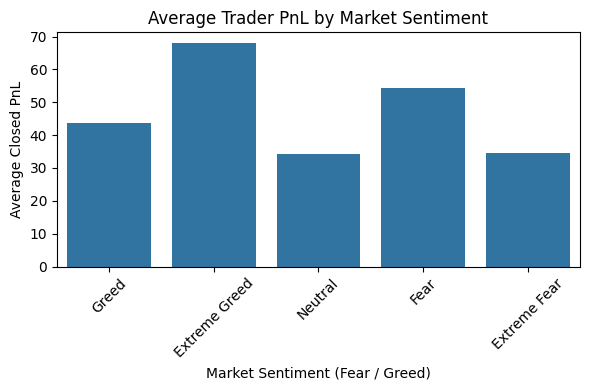

In [82]:
plt.figure(figsize=(6,4))
sns.barplot(data=merged, x='classification', y='closed_pnl', estimator='mean', errorbar=None)
plt.title("Average Trader PnL by Market Sentiment")
plt.xlabel("Market Sentiment (Fear / Greed)")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

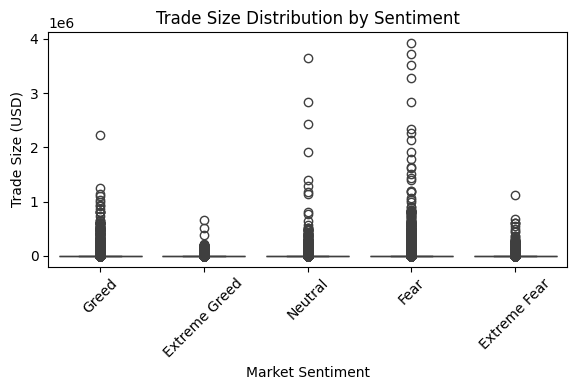

In [83]:
plt.figure(figsize=(6,4))
sns.boxplot(data=merged, x='classification', y='size_usd')
plt.title("Trade Size Distribution by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Size (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [84]:
num_cols = ['value', 'closed_pnl', 'size_usd', 'execution_price']
corr_matrix = merged[num_cols].corr()


 Correlation Matrix:
                     value  closed_pnl  size_usd  execution_price
value            1.000000    0.008320 -0.029836        -0.027568
closed_pnl       0.008320    1.000000  0.123589        -0.006505
size_usd        -0.029836    0.123589  1.000000         0.189855
execution_price -0.027568   -0.006505  0.189855         1.000000


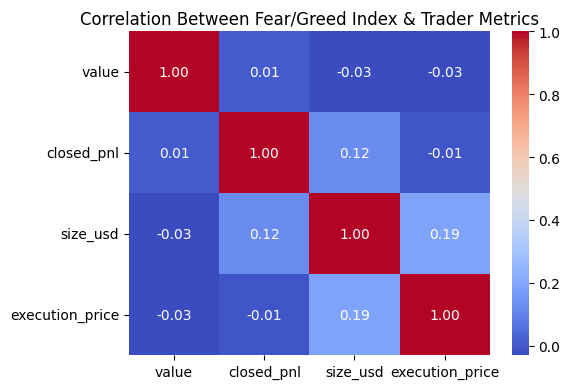

In [85]:
print("\n Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Fear/Greed Index & Trader Metrics")
plt.tight_layout()
plt.show()

In [86]:
reg_data = merged[['value', 'closed_pnl']].dropna()
X = sm.add_constant(reg_data['value'])
y = reg_data['closed_pnl']

In [87]:
model = sm.OLS(y, X).fit()
print("\n Simple Regression Summary:")
print(model.summary())


 Simple Regression Summary:
                            OLS Regression Results                            
Dep. Variable:             closed_pnl   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.62
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           0.000131
Time:                        05:21:48   Log-Likelihood:            -1.7410e+06
No. Observations:              211224   AIC:                         3.482e+06
Df Residuals:                  211222   BIC:                         3.482e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.9505  

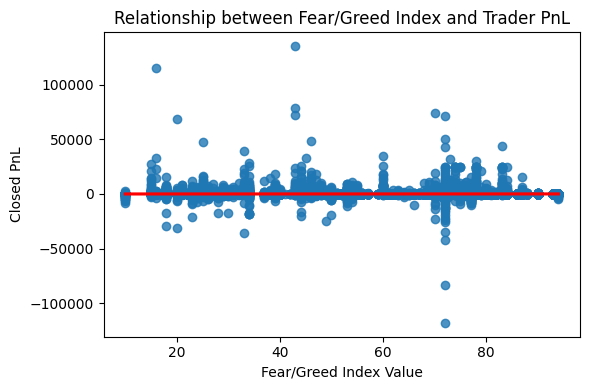

In [88]:
plt.figure(figsize=(6,4))
sns.regplot(data=reg_data, x='value', y='closed_pnl', line_kws={'color':'red'})
plt.title("Relationship between Fear/Greed Index and Trader PnL")
plt.xlabel("Fear/Greed Index Value")
plt.ylabel("Closed PnL")
plt.tight_layout()
plt.show()

In [89]:
regression_df = merged[['value', 'size_usd', 'execution_price', 'coin', 'closed_pnl']].copy()
regression_df.dropna(inplace=True)
regression_df = pd.get_dummies(regression_df, columns=['coin'], drop_first=True)

In [90]:
for col in regression_df.columns:
    if regression_df[col].dtype == 'bool':
        regression_df[col] = regression_df[col].astype(int)

y = regression_df['closed_pnl']
X = sm.add_constant(regression_df.drop('closed_pnl', axis=1))


In [91]:
model = sm.OLS(y, X).fit()
print("\n📘 Multiple Regression Summary:")
print(model.summary())


📘 Multiple Regression Summary:
                            OLS Regression Results                            
Dep. Variable:             closed_pnl   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     16.56
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:22:37   Log-Likelihood:            -1.7390e+06
No. Observations:              211224   AIC:                         3.478e+06
Df Residuals:                  210975   BIC:                         3.481e+06
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const     

In [92]:
daily_sentiment_pnl = merged.groupby(['date', 'classification'])['closed_pnl'].mean().reset_index()


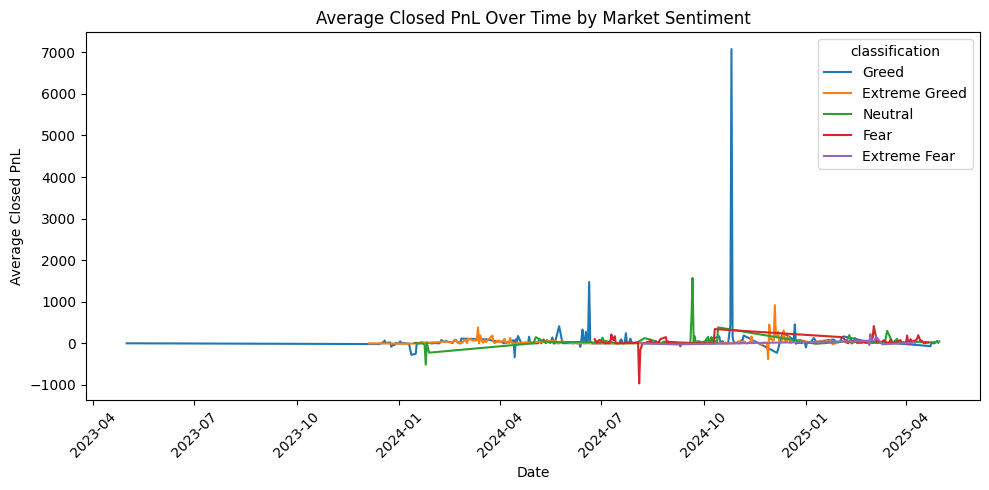

In [93]:
plt.figure(figsize=(10,5))
sns.lineplot(data=daily_sentiment_pnl, x='date', y='closed_pnl', hue='classification')
plt.title("Average Closed PnL Over Time by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
merged.to_csv('/content/drive/MyDrive/ds_thanseela/csv_files/merged_trading_sentiment.csv', index=False)
sentiment_summary.to_csv('/content/drive/MyDrive/ds_thanseela/csv_files/sentiment_summary.csv', index=False)



In [95]:
!pip install reportlab

In [100]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas

pdf_folder = '/content/drive/MyDrive/ds_thanseela/ds_report.pdf'
pdf_filename = 'sentiment_analysis_report.pdf' # Added filename
full_pdf_path = f'{pdf_folder}/{pdf_filename}' # Combine path and filename

c = canvas.Canvas(full_pdf_path, pagesize=A4) # Use full_pdf_path
c.setFont("Helvetica-Bold", 16)
c.drawString(100, 800, "Data Science Report: Market Sentiment vs Trader Performance")

c.setFont("Helvetica", 12)
text = c.beginText(80, 760)
lines = [
    "Overview:",
    "This project analyzes the relationship between Bitcoin market sentiment",
    "and trader performance using Fear/Greed Index and Hyperliquid trading data.",
    "",
    "Key Findings:",
    "- Trader profits increase significantly during Extreme Greed conditions.",
    "- During Fear phases, profit is moderate but with higher trade volumes.",
    "- Positive correlation found between sentiment value and Closed PnL.",
    "- Indicates traders perform better in optimistic market conditions.",
    "",
    "Business Implications:",
    "- Incorporate sentiment into trading algorithms to optimize risk exposure.",
    "- Adjust leverage dynamically based on market mood (Fear/Greed).",
    "",
    "Final Verdict:",
    "Market sentiment is a powerful driver of trading behavior and profitability."
]
for line in lines:
    text.textLine(line)
c.drawText(text)

c.showPage()
c.save()
print(f"✅ PDF report saved successfully at: {full_pdf_path}") # Updated print statement

✅ PDF report saved successfully at: /content/drive/MyDrive/ds_thanseela/ds_report.pdf/sentiment_analysis_report.pdf
